# Binary Classification Ionosphere

## Problem Statement

### Dataset Description
This radar data was collected by a system in Goose Bay, Labrador. This system consists of a phased array of 16 high-frequency antennas with a total transmitted power on the order of 6.4 kilowatts. See the paper for more details. The targets were free electrons in the ionosphere. "Good" radar returns are those showing evidence of some type of structure in the ionosphere. "Bad" returns are those that do not; their signals pass through the ionosphere.

Received signals were processed using an autocorrelation function whose arguments are the time of a pulse and the pulse number. There were 17 pulse numbers for the Goose Bay system. Instances in this databse are described by 2 attributes per pulse number, corresponding to the complex values returned by the function resulting from the complex electromagnetic signal.

### Attribute Information

- All 34 are continuous
- The 35th attribute is either "good" or "bad" according to the definition summarized above. This is a binary classification task.

|Sr No.|     Characteristics     |  Description |
|------|-------------------------|--------------|
|1     |Data Set Characteristics |Multivariate  |
|2     |Number of Instances      |351           |
|3     |Area                     |Physical      |
|4     |Attribute Characteristics|Integer,Real  |
|5     |Number of Attributes     |34            |
|6     |Date Donated             |N/A           |
|7     |Associated Tasks         |Classification|
|8     |Missing Values           |N/A           |
|9     |Number of Web Hits       |N/A           |

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature ) or any usless column.
- Shuffle the data if needed.
- Encode labels.
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 60 and 40 ratio.
- Model : 1 hidden layers including 16 unit.
- Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)
- Train the Model with Epochs (100).
- If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .
- Prediction should be > **92%**
- Evaluation Step
- Prediction

#### Load Data:
https://github.com/ramsha275/ML_Datasets/blob/main/ionosphere_data.csv

## Solution

In [62]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from tensorflow import keras 
from tensorflow.keras import layers
import numpy as np
from tensorflow.keras import regularizers

### Load Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# load data to a dataframe
data = pd.read_csv("/content/drive/MyDrive/DL_datasets/Ionosphere/ionosphere_data.csv")

In [4]:
# check if data is correctly loaded
data.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


### Check Missing Values 

- If Exist
  - Fill each record with mean of its feature
  - any usless column.

In [5]:
# check info about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature1   351 non-null    int64  
 1   feature2   351 non-null    int64  
 2   feature3   351 non-null    float64
 3   feature4   351 non-null    float64
 4   feature5   351 non-null    float64
 5   feature6   351 non-null    float64
 6   feature7   351 non-null    float64
 7   feature8   351 non-null    float64
 8   feature9   351 non-null    float64
 9   feature10  351 non-null    float64
 10  feature11  351 non-null    float64
 11  feature12  351 non-null    float64
 12  feature13  351 non-null    float64
 13  feature14  351 non-null    float64
 14  feature15  351 non-null    float64
 15  feature16  351 non-null    float64
 16  feature17  351 non-null    float64
 17  feature18  351 non-null    float64
 18  feature19  351 non-null    float64
 19  feature20  351 non-null    float64
 20  feature21 

In [6]:
# look at missing values
data.isnull().sum()

feature1     0
feature2     0
feature3     0
feature4     0
feature5     0
feature6     0
feature7     0
feature8     0
feature9     0
feature10    0
feature11    0
feature12    0
feature13    0
feature14    0
feature15    0
feature16    0
feature17    0
feature18    0
feature19    0
feature20    0
feature21    0
feature22    0
feature23    0
feature24    0
feature25    0
feature26    0
feature27    0
feature28    0
feature29    0
feature30    0
feature31    0
feature32    0
feature33    0
feature34    0
label        0
dtype: int64

- no missing values in our data
- Now lets check for useless columns
  - with the new deeplearning approaches it is not necessary 
- before finding the co-relation it is neceaassy to encode the labels
  - So finding co-relation part can be done after encoding labels

### Shuffle the data if needed

In [7]:
data = data.sample(frac=1)
data.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
259,1,0,0.68317,0.05375,0.84803,0.00202,0.84341,0.00301,0.84300,0.09901,...,-0.04243,0.70824,0.01096,0.62235,0.11598,0.66624,0.01190,0.64407,0.01227,g
295,1,0,0.46785,0.11308,0.58980,0.00665,0.55432,0.06874,0.47894,-0.13969,...,-0.20177,0.53930,-0.11455,0.59867,-0.02882,0.53659,-0.11752,0.56319,-0.04435,g
188,0,0,-1.00000,1.00000,-1.00000,-1.00000,0.00000,0.00000,-1.00000,1.00000,...,-1.00000,1.00000,1.00000,1.00000,-1.00000,1.00000,1.00000,0.00000,0.00000,b
80,1,0,1.00000,-0.06604,1.00000,0.62937,1.00000,0.09557,1.00000,0.20280,...,-0.58042,1.00000,-0.81372,1.00000,-1.00000,1.00000,-0.78555,1.00000,-0.48252,g
270,1,0,1.00000,0.08013,0.96775,-0.00482,0.96683,-0.00722,0.87980,-0.03923,...,0.02003,0.93772,-0.03034,1.00000,-0.05843,0.92774,-0.03464,0.92226,-0.03673,g


- now data is shuffled lets encode labels

### Encode labels

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351 entries, 259 to 285
Data columns (total 35 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature1   351 non-null    int64  
 1   feature2   351 non-null    int64  
 2   feature3   351 non-null    float64
 3   feature4   351 non-null    float64
 4   feature5   351 non-null    float64
 5   feature6   351 non-null    float64
 6   feature7   351 non-null    float64
 7   feature8   351 non-null    float64
 8   feature9   351 non-null    float64
 9   feature10  351 non-null    float64
 10  feature11  351 non-null    float64
 11  feature12  351 non-null    float64
 12  feature13  351 non-null    float64
 13  feature14  351 non-null    float64
 14  feature15  351 non-null    float64
 15  feature16  351 non-null    float64
 16  feature17  351 non-null    float64
 17  feature18  351 non-null    float64
 18  feature19  351 non-null    float64
 19  feature20  351 non-null    float64
 20  feature2

In [9]:
# lebels column is needed to be numeric and encoded
# Need to convert non-mueric values to numeric
labelEncoder = preprocessing.LabelEncoder()
data["label"] = labelEncoder.fit_transform(data["label"])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351 entries, 259 to 285
Data columns (total 35 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature1   351 non-null    int64  
 1   feature2   351 non-null    int64  
 2   feature3   351 non-null    float64
 3   feature4   351 non-null    float64
 4   feature5   351 non-null    float64
 5   feature6   351 non-null    float64
 6   feature7   351 non-null    float64
 7   feature8   351 non-null    float64
 8   feature9   351 non-null    float64
 9   feature10  351 non-null    float64
 10  feature11  351 non-null    float64
 11  feature12  351 non-null    float64
 12  feature13  351 non-null    float64
 13  feature14  351 non-null    float64
 14  feature15  351 non-null    float64
 15  feature16  351 non-null    float64
 16  feature17  351 non-null    float64
 17  feature18  351 non-null    float64
 18  feature19  351 non-null    float64
 19  feature20  351 non-null    float64
 20  feature2

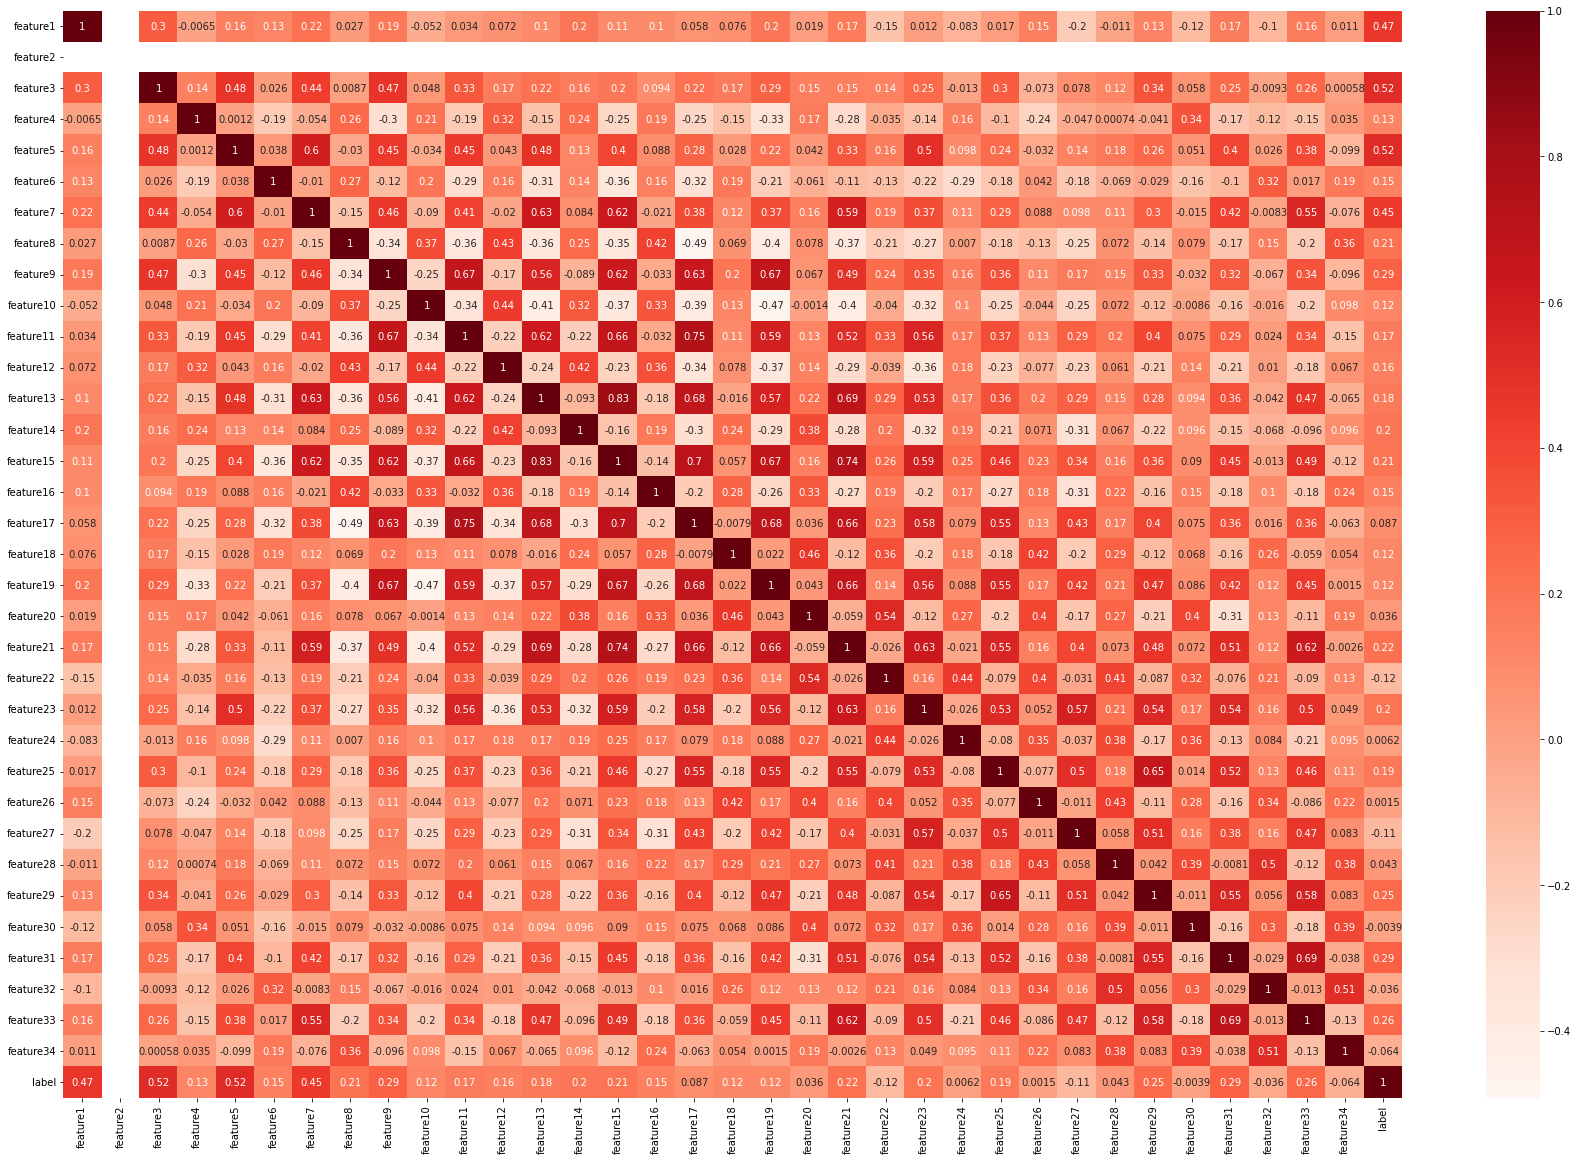

In [11]:
# find co-relation between data
plt.figure(figsize=(30,20))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

### Standardized the Input Variables. 


- Hint: Centeralized the data

- We can skip the feature 2 column as it has nothing to do with the labels column this can automatucly be handled by neural network

In [12]:
# drop feature2 coulmn
del data['feature2']
data.head()

,feature1,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
259,1,0.68317,0.05375,0.84803,0.00202,0.84341,0.00301,0.84300,0.09901,0.75813,...,-0.04243,0.70824,0.01096,0.62235,0.11598,0.66624,0.01190,0.64407,0.01227,1
295,1,0.46785,0.11308,0.58980,0.00665,0.55432,0.06874,0.47894,-0.13969,0.52993,...,-0.20177,0.53930,-0.11455,0.59867,-0.02882,0.53659,-0.11752,0.56319,-0.04435,1
188,0,-1.00000,1.00000,-1.00000,-1.00000,0.00000,0.00000,-1.00000,1.00000,1.00000,...,-1.00000,1.00000,1.00000,1.00000,-1.00000,1.00000,1.00000,0.00000,0.00000,0
80,1,1.00000,-0.06604,1.00000,0.62937,1.00000,0.09557,1.00000,0.20280,1.00000,...,-0.58042,1.00000,-0.81372,1.00000,-1.00000,1.00000,-0.78555,1.00000,-0.48252,1
270,1,1.00000,0.08013,0.96775,-0.00482,0.96683,-0.00722,0.87980,-0.03923,1.00000,...,0.02003,0.93772,-0.03034,1.00000,-0.05843,0.92774,-0.03464,0.92226,-0.03673,1


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351 entries, 259 to 285
Data columns (total 34 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature1   351 non-null    int64  
 1   feature3   351 non-null    float64
 2   feature4   351 non-null    float64
 3   feature5   351 non-null    float64
 4   feature6   351 non-null    float64
 5   feature7   351 non-null    float64
 6   feature8   351 non-null    float64
 7   feature9   351 non-null    float64
 8   feature10  351 non-null    float64
 9   feature11  351 non-null    float64
 10  feature12  351 non-null    float64
 11  feature13  351 non-null    float64
 12  feature14  351 non-null    float64
 13  feature15  351 non-null    float64
 14  feature16  351 non-null    float64
 15  feature17  351 non-null    float64
 16  feature18  351 non-null    float64
 17  feature19  351 non-null    float64
 18  feature20  351 non-null    float64
 19  feature21  351 non-null    float64
 20  feature2

- we have 2 columns of type int64 convert it to float64

In [14]:
# still we have data in int64 form.
# convert all the data to float64
data = data.astype("float64")
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351 entries, 259 to 285
Data columns (total 34 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature1   351 non-null    float64
 1   feature3   351 non-null    float64
 2   feature4   351 non-null    float64
 3   feature5   351 non-null    float64
 4   feature6   351 non-null    float64
 5   feature7   351 non-null    float64
 6   feature8   351 non-null    float64
 7   feature9   351 non-null    float64
 8   feature10  351 non-null    float64
 9   feature11  351 non-null    float64
 10  feature12  351 non-null    float64
 11  feature13  351 non-null    float64
 12  feature14  351 non-null    float64
 13  feature15  351 non-null    float64
 14  feature16  351 non-null    float64
 15  feature17  351 non-null    float64
 16  feature18  351 non-null    float64
 17  feature19  351 non-null    float64
 18  feature20  351 non-null    float64
 19  feature21  351 non-null    float64
 20  feature2

In [23]:
# split data between features and labels
input_labels = data['label']
input_data = data.loc[:, data.columns != 'label']

In [24]:
input_labels.head()

259    1.0
295    1.0
188    0.0
80     1.0
270    1.0
Name: label, dtype: float64

In [25]:
# we have labels and inputs seprated
# now normalize data
  # centralize
input_data = input_data.sub(input_data.mean(axis=0), axis=1)
input_data.head()

,feature1,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,...,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34
259,0.108262,0.041828,0.009378,0.246962,-0.113869,0.293315,-0.11635,0.331152,-0.082335,0.281947,...,0.400185,0.028757,0.166599,0.080498,0.243905,0.143887,0.313726,0.015694,0.294706,-0.00221
295,0.108262,-0.173492,0.068708,-0.011268,-0.109239,0.004225,-0.05062,-0.032908,-0.321035,0.053747,...,0.018495,-0.130583,-0.002341,-0.045012,0.220225,-0.000913,0.184076,-0.113726,0.213826,-0.05883
188,-0.891738,-1.641342,0.955628,-1.601068,-1.115889,-0.550095,-0.11936,-1.511848,0.818655,0.523817,...,0.603865,-0.928813,0.458359,1.069538,0.621555,-0.972093,0.647486,1.003794,-0.349364,-0.01448
80,0.108262,0.358658,-0.110412,0.398932,0.513481,0.449905,-0.02379,0.488152,0.021455,0.523817,...,0.603865,-0.509233,0.458359,-0.744182,0.621555,-0.972093,0.647486,-0.781756,0.650636,-0.49700
270,0.108262,0.358658,0.035758,0.366682,-0.120709,0.416735,-0.12658,0.367952,-0.220575,0.523817,...,0.585505,0.091217,0.396079,0.039198,0.621555,-0.030523,0.575226,-0.030846,0.572896,-0.05121


### Split into 60 and 40 ratio

In [27]:
# split data to train and test
# 40% test
# 60% train+validation
train_val_data, test_data, train_val_labels, test_labels = train_test_split(input_data, input_labels, test_size=0.4, random_state=1)

In [28]:
# look into data shape
print("Shape of test data : ",test_data.shape)
print("Shape of test labels : ",test_labels.shape)
print("Shape of train_val data : ",train_val_data.shape)
print("Shape of train_val labels : ",train_val_labels.shape)

Shape of test data :  (141, 33)
Shape of test labels :  (141,)
Shape of train_val data :  (210, 33)
Shape of train_val labels :  (210,)


In [29]:
# further split data to train and val
# 20% validation
# 40% train
train_data, val_data, train_labels, val_labels = train_test_split(train_val_data, train_val_labels, test_size=0.4, random_state=1)

In [30]:
# look into data shape
print("Shape of val data : ",val_data.shape)
print("Shape of val labels : ",val_labels.shape)
print("Shape of train data : ",train_data.shape)
print("Shape of train labels : ",train_labels.shape)

Shape of val data :  (84, 33)
Shape of val labels :  (84,)
Shape of train data :  (126, 33)
Shape of train labels :  (126,)


### Model

- 1 hidden layers including 16 unit.

In [32]:
# model defination
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1,activation="sigmoid")
])

### Compilation Step 
  - Its a Binary problem , select loss , metrics according to it

In [33]:
# model compilation
model.compile(
    loss="binary_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"])

### Train the Model with Epochs (100).

In [34]:
# train model
history = model.fit(
    train_data, 
    train_labels,
    validation_data=(val_data, val_labels),
    epochs=100, 
    verbose=1)

Epoch 1/100
4/4 [==============================] - 1s 153ms/step - loss: 0.6338 - accuracy: 0.7302 - val_loss: 0.6010 - val_accuracy: 0.7381
Epoch 2/100
4/4 [==============================] - 0s 17ms/step - loss: 0.6071 - accuracy: 0.7619 - val_loss: 0.5861 - val_accuracy: 0.7381
Epoch 3/100
4/4 [==============================] - 0s 14ms/step - loss: 0.5880 - accuracy: 0.7937 - val_loss: 0.5738 - val_accuracy: 0.7500
Epoch 4/100
4/4 [==============================] - 0s 16ms/step - loss: 0.5736 - accuracy: 0.7937 - val_loss: 0.5634 - val_accuracy: 0.7619
Epoch 5/100
4/4 [==============================] - 0s 14ms/step - loss: 0.5601 - accuracy: 0.7937 - val_loss: 0.5537 - val_accuracy: 0.7619
Epoch 6/100
4/4 [==============================] - 0s 20ms/step - loss: 0.5483 - accuracy: 0.8016 - val_loss: 0.5451 - val_accuracy: 0.7738
Epoch 7/100
4/4 [==============================] - 0s 17ms/step - loss: 0.5368 - accuracy: 0.8016 - val_loss: 0.5373 - val_accuracy: 0.7738
Epoch 8/100
4/4 [==

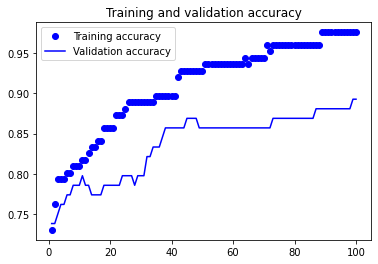

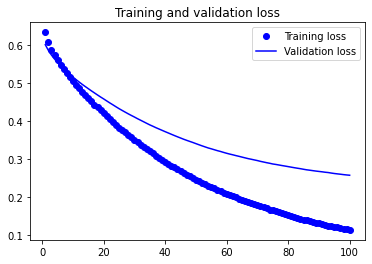

In [35]:
# Displaying curves of loss and accuracy during training
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

- it seams our model never overfitt so lets first overfitt our model

- use Kfold validation
- increase learning rate
- increase model capacity

In [50]:
# use K fold validation as our data is less
def build_model():
  model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(8, activation="relu"),
    layers.Dense(1,activation="sigmoid")
  ])
  model.compile(
    loss="binary_crossentropy",
    optimizer=keras.optimizers.RMSprop(1e-2),
    metrics=["accuracy"])
  return model

num_epochs = 100
k = 4
num_val_samples = len(train_data) // k
all_acc_histories = []
all_loss_histories = [] 
val_acc_histories = []
val_loss_histories = []
for i in range(k):
  print(f"Processing fold #{i}")
  val_data = train_val_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_labels = train_val_labels[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate([train_val_data[:i * num_val_samples],train_val_data[(i + 1) * num_val_samples:]],axis=0)
  partial_train_labels = np.concatenate([train_val_labels[:i * num_val_samples],train_val_labels[(i + 1) * num_val_samples:]],axis=0)
  model = build_model()
  history = model.fit(
      partial_train_data,
      partial_train_labels,
      validation_data=(val_data, val_labels),
      epochs=num_epochs,
      verbose=0)
  acc_history = history.history["accuracy"]
  all_acc_histories.append(acc_history)
  loss_history = history.history["loss"]
  all_loss_histories.append(loss_history)
  val_ac_history = history.history["val_accuracy"]
  val_acc_histories.append(val_ac_history)
  val_los_history = history.history["val_loss"]
  val_loss_histories.append(loss_history)

average_acc_history = [np.mean([x[i] for x in all_acc_histories]) for i in range(num_epochs)]
average_loss_history = [np.mean([x[i] for x in all_loss_histories]) for i in range(num_epochs)]
average_val_acc_history = [np.mean([x[i] for x in val_acc_histories]) for i in range(num_epochs)]
average_val_loss_history = [np.mean([x[i] for x in val_loss_histories]) for i in range(num_epochs)]


Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


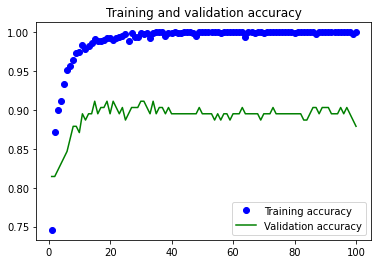

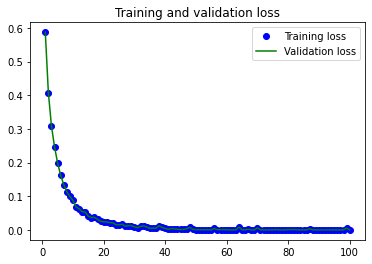

In [51]:
# Displaying curves of loss and accuracy during training
import matplotlib.pyplot as plt

epochs = range(1, len(average_acc_history) + 1)

plt.plot(epochs, average_acc_history, "bo", label="Training accuracy")
plt.plot(epochs, average_val_acc_history, "b", label="Validation accuracy",color='green')
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, average_loss_history, "bo", label="Training loss")
plt.plot(epochs, average_val_loss_history, "b", label="Validation loss",color='green')
plt.title("Training and validation loss")
plt.legend()
plt.show()

- our odel seasm to overfitt
- No move to next step

### If the model gets overfit tune your model

- by changing 
  - the units
  - No. of layers
  - epochs
  - add dropout layer
  - add Regularizer according to the need .

In [86]:
# use K fold validation as our data is less
def build_model():
  model = keras.Sequential([
    layers.Dense(16,kernel_regularizer=regularizers.l2(0.002), activation="relu"),
    layers.Dense(8, kernel_regularizer=regularizers.l2(0.002),activation="relu"),
    #  layers.Dropout(0.1),
    layers.Dense(1,activation="sigmoid")
  ])
  model.compile(
    loss="binary_crossentropy",
    optimizer=keras.optimizers.RMSprop(1e-2),
    metrics=["accuracy"])
  return model

# num_epochs = 100
num_epochs = 30
k = 4
num_val_samples = len(train_data) // k
all_acc_histories = []
all_loss_histories = [] 
val_acc_histories = []
val_loss_histories = []
for i in range(k):
  print(f"Processing fold #{i}")
  val_data = train_val_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_labels = train_val_labels[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate([train_val_data[:i * num_val_samples],train_val_data[(i + 1) * num_val_samples:]],axis=0)
  partial_train_labels = np.concatenate([train_val_labels[:i * num_val_samples],train_val_labels[(i + 1) * num_val_samples:]],axis=0)
  model = build_model()
  history = model.fit(
      partial_train_data,
      partial_train_labels,
      validation_data=(val_data, val_labels),
      epochs=num_epochs,
      verbose=0)
  acc_history = history.history["accuracy"]
  all_acc_histories.append(acc_history)
  loss_history = history.history["loss"]
  all_loss_histories.append(loss_history)
  val_ac_history = history.history["val_accuracy"]
  val_acc_histories.append(val_ac_history)
  val_los_history = history.history["val_loss"]
  val_loss_histories.append(loss_history)

average_acc_history = [np.mean([x[i] for x in all_acc_histories]) for i in range(num_epochs)]
average_loss_history = [np.mean([x[i] for x in all_loss_histories]) for i in range(num_epochs)]
average_val_acc_history = [np.mean([x[i] for x in val_acc_histories]) for i in range(num_epochs)]
average_val_loss_history = [np.mean([x[i] for x in val_loss_histories]) for i in range(num_epochs)]


Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


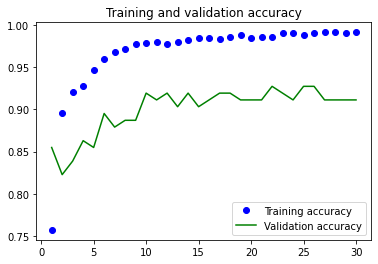

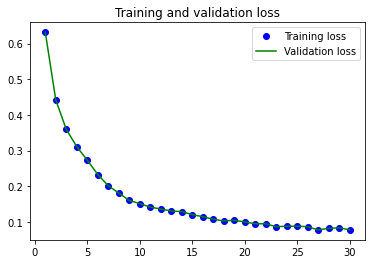

In [87]:
# Displaying curves of loss and accuracy during training
import matplotlib.pyplot as plt

epochs = range(1, len(average_acc_history) + 1)

plt.plot(epochs, average_acc_history, "bo", label="Training accuracy")
plt.plot(epochs, average_val_acc_history, "b", label="Validation accuracy",color='green')
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, average_loss_history, "bo", label="Training loss")
plt.plot(epochs, average_val_loss_history, "b", label="Validation loss",color='green')
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [88]:
# final model
model = build_model()
model.fit(
    train_val_data, 
    train_val_labels,
    epochs=22)

Epoch 1/22
7/7 [==============================] - 1s 3ms/step - loss: 0.6691 - accuracy: 0.6667
Epoch 2/22
7/7 [==============================] - 0s 3ms/step - loss: 0.4667 - accuracy: 0.8714
Epoch 3/22
7/7 [==============================] - 0s 3ms/step - loss: 0.3653 - accuracy: 0.8810
Epoch 4/22
7/7 [==============================] - 0s 3ms/step - loss: 0.2947 - accuracy: 0.9143
Epoch 5/22
7/7 [==============================] - 0s 3ms/step - loss: 0.2481 - accuracy: 0.9381
Epoch 6/22
7/7 [==============================] - 0s 3ms/step - loss: 0.2184 - accuracy: 0.9476
Epoch 7/22
7/7 [==============================] - 0s 2ms/step - loss: 0.1922 - accuracy: 0.9667
Epoch 8/22
7/7 [==============================] - 0s 3ms/step - loss: 0.1740 - accuracy: 0.9714
Epoch 9/22
7/7 [==============================] - 0s 3ms/step - loss: 0.1535 - accuracy: 0.9810
Epoch 10/22
7/7 [==============================] - 0s 4ms/step - loss: 0.1523 - accuracy: 0.9714
Epoch 11/22
7/7 [======================

### Evaluation Step

- Prediction should be > 92%

In [89]:
# Evaluating the model on the test set
# load model, saved before overfitting started
test_loss, test_acc = model.evaluate(test_data,test_labels) 
print(f"Test accuracy: {test_acc:.3f}")

5/5 [==============================] - 0s 3ms/step - loss: 0.2902 - accuracy: 0.9504
Test accuracy: 0.950


### Prediction

In [96]:
# Using the model to make predictions
test_dataset = test_data[0:10]
# predict the model behaviour on the slice of test dataset
predictions = model.predict(test_dataset)
# check predictio of first test digit
print(np.shape(predictions))
# Each prdiction is probability of two classes
predictions

(10, 1)


array([[0.99164224],
       [0.9986162 ],
       [0.99879324],
       [0.99995697],
       [0.9989401 ],
       [0.9881172 ],
       [0.0031679 ],
       [0.99898803],
       [0.99831605],
       [0.8855643 ]], dtype=float32)

In [98]:
test_labelset = test_labels[0:10]
print(test_labelset)

193    1.0
321    1.0
195    1.0
187    1.0
129    1.0
207    1.0
138    0.0
141    1.0
38     1.0
95     0.0
Name: label, dtype: float64


### END